In [ ]:
# Define the Phoneme class
class Phoneme:
    def __init__(self, p: str, es: bool, hu: bool):
        self.p = p 
        self.es = es
        self.hu = hu

    def __repr__(self):
        return f"(p={self.p}, es={True if self.es else False}, hu={True if self.hu else False})"


# Create p objects for each unique p
phonemes = {
    "y": Phoneme(p="y", es=False, hu=True),
    "æ": Phoneme(p="æ", es=False, hu=False),
    "ø": Phoneme(p="ø", es=False, hu=True),
    "ʁ": Phoneme(p="ʁ", es=False, hu=False),
    "ɶ": Phoneme(p="ɶ", es=False, hu=False),
    "u": Phoneme(p="u", es=True, hu=True),
    "e": Phoneme(p="e", es=True, hu=True),
    "i": Phoneme(p="i", es=True, hu=True),
    "a": Phoneme(p="a", es=True, hu=True),
    "ɛ": Phoneme(p="ɛ", es=True, hu=True),
    "ɡ": Phoneme(p="ɡ", es=True, hu=True),
    "v": Phoneme(p="v", es=True, hu=True),
    "p": Phoneme(p="p", es=True, hu=True),
}


# Dictionary for pairs and their associated p contrasts
pairs_phonemes = {
    ('ful', 'ful'): phonemes['u'],
    ('lys', 'lys'): phonemes['y'],
    ('mæt', 'mæt'): phonemes['æ'],
    ('kat', 'kat'): phonemes['a'],
    ('ben', 'ben'): phonemes['e'],
    ('grå', 'grå'): phonemes['ʁ'],
    ('nø', 'nø'): phonemes['ø'],
    ('rød', 'rød'): phonemes['ʁ'],
    ('møl', 'møl'): phonemes['ø'],
    ('syr', 'syr'): phonemes['y'],
    ('dør', 'dør'): phonemes['ɶ'],
    ('skæl', 'skæl'): phonemes['æ'],
    ('røre', 'røre'): phonemes['ʁ'],
    ('fuld', 'fuld'): phonemes['u'],
    ('ful', 'fyl'): phonemes['y'],
    ('syn', 'søn'): phonemes['ø'],
    ('set', 'sæt'): phonemes['æ'],
    ('kat', 'kæt'): phonemes['æ'],
    ('fisk', 'fæsk'): phonemes['æ'],
    ('lys', 'los'): phonemes['y'],
    ('ben', 'bøn'): phonemes['ø'],
    ('nø', 'nu'): phonemes['ø'],
    ('rød', 'ryd'): phonemes['y'],
    ('mølle', 'mulle'): phonemes['ø'],
    ('syd', 'sød'): phonemes['y'],
    ('tat', 'tæt'): phonemes['æ'],
    ('sø', 'su'): phonemes['ø'],
    ('væg', 'vægt'): phonemes['ɡ'],
    ('løg', 'ly'): phonemes['y'],
    ('rør', 'rær'): phonemes['æ'],
    ('rød', 'lød'): phonemes['ʁ'],
    ('fuld', 'fugl'): phonemes['u'],
    ('gul', 'guld'): phonemes['u'],
    ('sinde', 'sende'): phonemes['i'],
    ('pil', 'bil'): phonemes['p'],
    ('ven', 'pen'): phonemes['v'],
    ('lidt', 'let'): phonemes['ɛ'],
    ('før', 'fær'): phonemes['æ']
}

print(f"Total pairs: {len(pairs_phonemes)}")

for pair, p in pairs_phonemes.items():
    print(f"{pair} : {p}")

print(pairs_phonemes[("løg", "ly")])

(p=y, es=False, hu=True)


In [47]:
!pip install pandas
!pip install openpyxl
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from typing import List

class Response:
    def __init__(self, is_correct: bool, word1: str, word2: str):
        self.is_correct = is_correct
        self.word1 = word1
        self.word2 = word2
        self.phoneme = pairs_phonemes[(word1, word2)]

    def __repr__(self):
        return (
            f"Response(isCorrect={self.is_correct}, "
            f"word1='{self.word1}', word2='{self.word2}')"
        )


# Class for participant data
class ParticipantData:
    def __init__(self, participant_id: str, language: str):
        self.id = participant_id
        self.language = language
        self.responses: List[Response] = []  # Initialize as an empty list

    def __repr__(self):
        return (
            f"ParticipantData(id={self.id}, language='{self.language}', "
            f"responses={self.responses})"
        )

In [56]:
import json
import pandas as pd

# Load the data from Excel
df = pd.read_excel("data.xlsx")

# Create a list to hold all participants' data
participants: List[ParticipantData] = []

# Process each row in the dataframe
for _, row in df.iterrows():
    # Extract participant-level data
    participant_id = row["Participant ID"]
    language = row["L1"]
    responses_json = row["Data"]

    responses_data = json.loads(responses_json)
    participant = ParticipantData(participant_id, language)

    # Add responses to the participant
    for response in responses_data:
        participant.responses.append(
            Response(
                is_correct=response["isCorrect"],
                word1=response["word1"],
                word2=response["word2"],
            )
        )
    participants.append(participant)

# Accessing the first response of the first participant
print(participants[0].responses[0].phoneme)

(p=ʁ, es=False, hu=False)


In [50]:
from collections import defaultdict

accuracy_es: List[int] = []
accuracy_hu: List[int] = []
accuracy_dk: List[int] = []

# Function to calculate accuracy for each participant
def calculate_participant_accuracy(participant: ParticipantData):
    total_trials = 38
    correct_trials = sum(1 for p in participant.responses if p.is_correct)
    return correct_trials / total_trials if total_trials > 0 else 0

print (calculate_participant_accuracy(participants[0]))

0.9210526315789473


In [51]:
from collections import defaultdict
from typing import Dict, List

language_accuracies: Dict[str, List[float]] = defaultdict(list)

for participant in participants:
    accuracy = calculate_participant_accuracy(participant)
    language_accuracies[participant.language].append(accuracy)

average_accuracies = {
    language: sum(accuracies) / len(accuracies) if accuracies else 0
    for language, accuracies in language_accuracies.items()
}

for language, avg_accuracy in average_accuracies.items():
    print(f"Language: {language}, Average Accuracy: {avg_accuracy:.2%}")

print (language_accuracies)

for language, accuracies in language_accuracies.items():
    print(f"Language: {language}, Number of Accuracies: {len(accuracies)}")

Language: Danish, Average Accuracy: 92.43%
Language: Hungarian, Average Accuracy: 74.81%
Language: Spanish, Average Accuracy: 73.18%
defaultdict(<class 'list'>, {'Danish': [0.9210526315789473, 0.868421052631579, 0.9473684210526315, 0.8947368421052632, 0.9473684210526315, 0.8947368421052632, 1.0, 0.9210526315789473], 'Hungarian': [0.7894736842105263, 0.7894736842105263, 0.7631578947368421, 0.8157894736842105, 0.7368421052631579, 0.7894736842105263, 0.7105263157894737, 0.7631578947368421, 0.8421052631578947, 0.7368421052631579, 0.7368421052631579, 0.7105263157894737, 0.7368421052631579, 0.6842105263157895, 0.7368421052631579, 0.7368421052631579, 0.7105263157894737, 0.7894736842105263, 0.7368421052631579, 0.6842105263157895, 0.7105263157894737], 'Spanish': [0.7105263157894737, 0.5789473684210527, 0.8157894736842105, 0.8157894736842105, 0.6842105263157895, 0.868421052631579, 0.7631578947368421, 0.7631578947368421, 0.8421052631578947, 0.631578947368421, 0.5789473684210527, 0.815789473684210

C:\Users\Kaiusz\AppData\Local\Temp\ipykernel_42464\3018248422.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
C:\Users\Kaiusz\AppData\Local\Temp\ipykernel_42464\3018248422.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


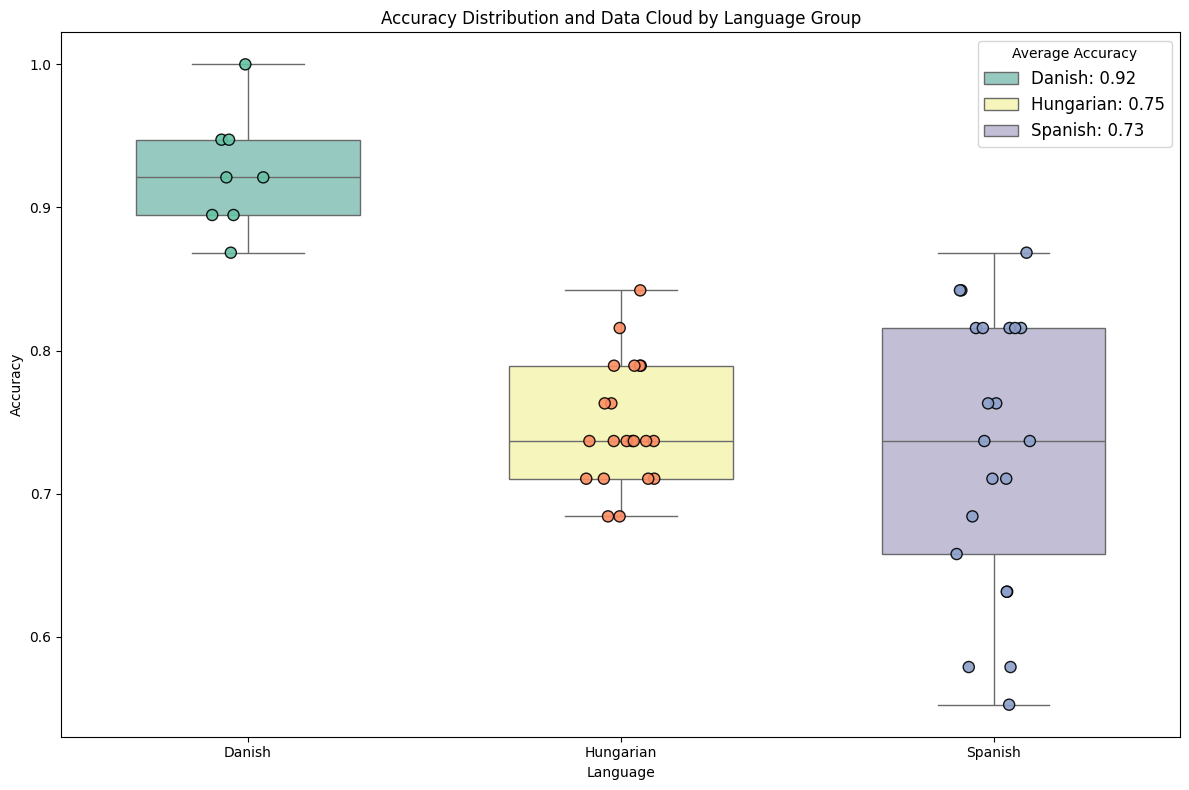

In [70]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from typing import Dict, List

# Initialize the language_accuracies dictionary as defaultdict
language_accuracies: Dict[str, List[float]] = defaultdict(list)

# Example of a participant data structure
# Assuming 'calculate_participant_accuracy' returns accuracy for a participant
for participant in participants:
    accuracy = calculate_participant_accuracy(participant)
    language_accuracies[participant.language].append(accuracy)

# Prepare the data for plotting
data = {
    "Language": [],
    "Accuracy": [],
}

# Flatten the data into the format needed for seaborn
for language, accuracies in language_accuracies.items():
    data["Language"].extend([language] * len(accuracies))
    data["Accuracy"].extend(accuracies)

# Convert to DataFrame
df = pd.DataFrame(data)

# Create the figure and axis for the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
ax = sns.boxplot(
    x="Language",
    y="Accuracy",
    data=df,
    palette="Set3",
    showfliers=False,
    width=0.6,  # Make boxplots slightly narrower to enhance distinction
)

# Overlay the data cloud with a stripplot
sns.stripplot(
    x="Language",
    y="Accuracy",
    data=df,
    jitter=True,
    size=8,  # Increase dot size
    alpha=0.9,  # Make dots less transparent
    palette="Set2",
    edgecolor="black",  # Add a black edge for better visibility
    linewidth=1,  # Slightly thicker edges
)

# Calculate average accuracies for each language
avg_accuracies = {
    language: sum(accuracies) / len(accuracies)
    for language, accuracies in language_accuracies.items()
}

# Create a list of labels for the legend
legend_labels = [
    f"{language}: {avg_accuracy:.2f}"
    for language, avg_accuracy in avg_accuracies.items()
]

# Create a custom legend
plt.legend(legend_labels, title="Average Accuracy", loc="upper right", fontsize=12)

# Customize the plot appearance
plt.title("Accuracy Distribution and Data Cloud by Language Group")
plt.xlabel("Language")
plt.ylabel("Accuracy")
plt.tight_layout()

# Show the plot
plt.show()

In [65]:
from collections import defaultdict
import pandas as pd

# Initialize storage for phoneme accuracy and word pairs
phoneme_accuracy = defaultdict(lambda: defaultdict(list))
phoneme_word_pairs = defaultdict(list)  # To store word pairs for each phoneme

# Iterate over participants and their responses
for participant in participants:
    for response in participant.responses:
        wordpair = (response.word1, response.word2)
        phoneme = response.phoneme.p
        phoneme_accuracy[phoneme][participant.language].append(response.is_correct)
        phoneme_word_pairs[phoneme].append(wordpair)

# Calculate average accuracy for each phoneme per language
table_data = defaultdict(dict)  # Stores data in a row-wise structure

for phoneme, language_data in phoneme_accuracy.items():
    for language, accuracies in language_data.items():
        avg_accuracy = round(sum(accuracies) / len(accuracies) if accuracies else 0, 2)
        table_data[phoneme][language] = avg_accuracy

# Convert to a pandas DataFrame
df = pd.DataFrame.from_dict(table_data, orient="index").fillna(0)

# Add word pairs to the DataFrame (remove duplicates)
df["Word Pair"] = df.index.map(
    lambda phoneme: ", ".join(
        [f"({pair[0]}, {pair[1]})" for pair in set(phoneme_word_pairs[phoneme])]
    )
)

# Rename columns for clarity
df.columns.name = "Language"
df.index.name = "Phoneme"

# Reorder columns to place 'Word Pair' as the first column
df = df[["Word Pair"] + [col for col in df.columns if col != "Word Pair"]]

# Print the table
print(df)

Language                                          Word Pair  Danish  \
Phoneme                                                               
ʁ          (grå, grå), (rød, lød), (rød, rød), (røre, røre)    1.00   
æ         (set, sæt), (før, fær), (skæl, skæl), (rør, ræ...    0.95   
y         (ful, fyl), (løg, ly), (syr, syr), (lys, los),...    0.95   
ɶ                                                (dør, dør)    1.00   
ø         (ben, bøn), (syn, søn), (mølle, mulle), (møl, ...    0.93   
v                                                (ven, pen)    1.00   
e                                                (ben, ben)    1.00   
u         (fuld, fuld), (ful, ful), (fuld, fugl), (gul, ...    0.91   
a                                                (kat, kat)    1.00   
ɛ                                               (lidt, let)    0.75   
i                                            (sinde, sende)    0.25   
p                                                (pil, bil)    0.75   
ɡ     

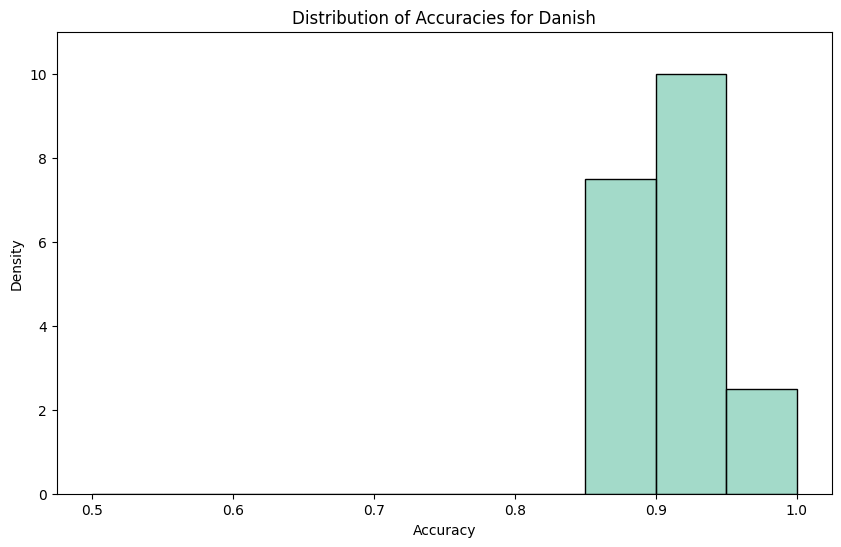

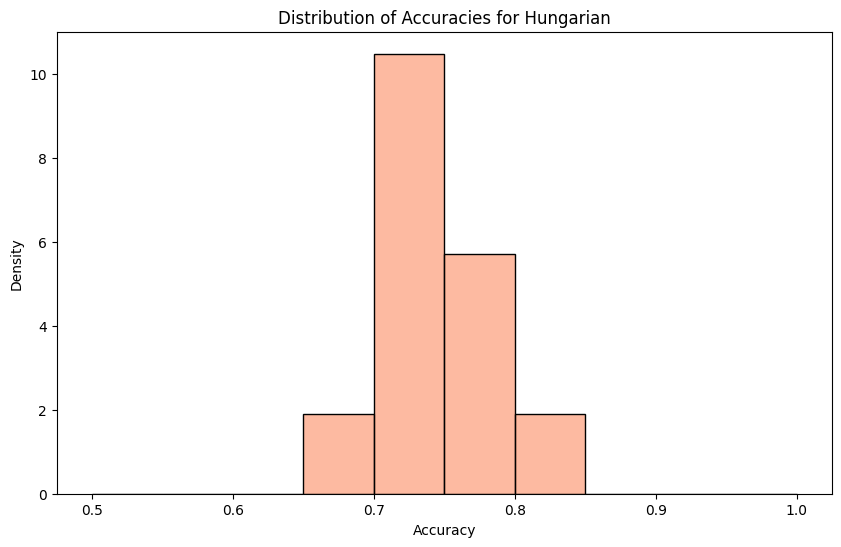

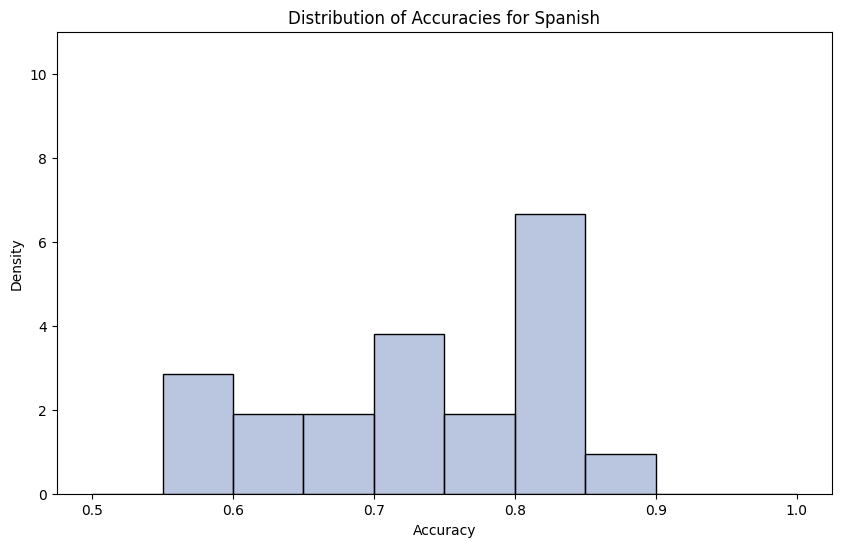

In [71]:
import numpy as np

# Plot accuracy histogram by group
for participant in participants:
    accuracy = calculate_participant_accuracy(participant)
    language_accuracies[participant.language].append(accuracy)

# Prepare the data for plotting
data = {
    "Language": [],
    "Accuracy": [],
}

# Flatten the data into the format needed for seaborn
for language, accuracies in language_accuracies.items():
    data["Language"].extend([language] * len(accuracies))
    data["Accuracy"].extend(accuracies)

# Convert to DataFrame
df = pd.DataFrame(data)

# Define color palette
palette = sns.color_palette("Set2", len(language_accuracies))

# Plot histograms with KDEs for each language
for idx, (language, color) in enumerate(zip(language_accuracies.keys(), palette)):
    plt.figure(figsize=(10, 6))
    sns.histplot(
        df[df["Language"] == language]["Accuracy"],
        kde=False,
        color=color,
        bins=np.arange(0.5, 1.05, 0.05),
        stat="density",
        edgecolor="black",
        alpha=0.6,
    )
    plt.title(f"Distribution of Accuracies for {language}")
    plt.xlabel("Accuracy")
    plt.ylabel("Density")
    plt.ylim(0, 11)
    plt.show()